In [18]:
import matplotlib.pyplot as plt
from relaxation_super_res import RelaxationSuperRes
import cv2
from upscaling_funcs import *
import numpy as np
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

In [2]:
img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
img_small = cv2.resize(img, (0, 0), fx=1/16, fy=1/16, interpolation=cv2.INTER_AREA)
img_relaxation, base_pixels = relaxation_upscale(img_small,16)
epsilon = 1e-4

In [16]:
kernel = np.ones((3,3))
# kernel = kernel / np.sum(kernel)
model_ones_3x3 = RelaxationSuperRes(kernel).fit(img_relaxation, base_pixels, 20)
img_relaxation_ones_3x3 = model_ones_3x3.predict(epsilon)

relaxation iter: 0
1601.4302084483793
relaxation iter: 1
33.430314993325446
relaxation iter: 2
39.87156755461345
relaxation iter: 3
47.375399403069466
relaxation iter: 4
56.22822279532896
relaxation iter: 5
66.79824015119902
relaxation iter: 6
79.94496772115272
relaxation iter: 7
109.7176183355344
relaxation iter: 8
140.90934031579314
relaxation iter: 9
70.61087196239565
relaxation iter: 10
6.009763452952094
relaxation iter: 11
0.029732996768144167
relaxation iter: 12
7.069885806655707e-07


In [4]:
kernel = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]])
# kernel = kernel / np.sum(kernel)

model_regular_3x3 = RelaxationSuperRes(kernel).fit(img_relaxation, base_pixels, 20)
img_relaxation_regular_3x3 = model_regular_3x3.predict(epsilon)

relaxation iter: 0
1601.4303103144498
relaxation iter: 1
33.30444455662633
relaxation iter: 2
39.9048873810318
relaxation iter: 3
47.29547561691232
relaxation iter: 4
56.20606878396751
relaxation iter: 5
66.79235801880148
relaxation iter: 6
79.93320233612044
relaxation iter: 7
109.72301102100386
relaxation iter: 8
140.9251127186217
relaxation iter: 9
70.62105033606734
relaxation iter: 10
6.010743421779413
relaxation iter: 11
0.029738360330378646
relaxation iter: 12
7.071282946218035e-07


In [5]:
kernel = np.ones((5,5))
# kernel = kernel / np.sum(kernel)
model_ones_5x5 = RelaxationSuperRes(kernel).fit(img_relaxation, base_pixels, 20)
img_relaxation_ones_5x5 = model_ones_5x5.predict(epsilon)

relaxation iter: 0
1601.4299655526784
relaxation iter: 1
33.590692650564
relaxation iter: 2
40.067667095606595
relaxation iter: 3
47.49689123267624
relaxation iter: 4
56.313038374654575
relaxation iter: 5
66.8639111232069
relaxation iter: 6
79.97051515619215
relaxation iter: 7
109.69821250929184
relaxation iter: 8
140.83851187302795
relaxation iter: 9
70.56490271235964
relaxation iter: 10
6.0053104804138435
relaxation iter: 11
0.02970863505437915
relaxation iter: 12
7.063518884797452e-07


In [6]:
kernel = np.array([[0, 0, 1, 0, 0],
                       [0, 1, 1, 1, 0],
                       [1, 1, 1, 1, 1],
                       [0, 1, 1, 1, 0],
                       [0, 0, 1, 0, 0]])
# kernel = kernel / np.sum(kernel)

model_regular_5x5 = RelaxationSuperRes(kernel).fit(img_relaxation, base_pixels, 20)
img_relaxation_regular_5x5 = model_regular_5x5.predict(epsilon)

relaxation iter: 0
1601.4301385227134
relaxation iter: 1
33.42553166669616
relaxation iter: 2
40.00138406261652
relaxation iter: 3
47.38742591839834
relaxation iter: 4
56.269114522375766
relaxation iter: 5
66.82672043556211
relaxation iter: 6
79.95445967942129
relaxation iter: 7
109.7079337150344
relaxation iter: 8
140.87654485236115
relaxation iter: 9
70.58967167613272
relaxation iter: 10
6.007719155688184
relaxation iter: 11
0.02972187110174109
relaxation iter: 12
7.06699277410282e-07


In [7]:
kernel = np.array([[0.0625, 0.125, 0.0625],
                    [0.125,  0.25,  0.125],
                    [0.0625, 0.125, 0.0625]])
# kernel = kernel / np.sum(kernel)

model_linear_3x3 = RelaxationSuperRes(kernel).fit(img_relaxation, base_pixels, 20)
img_relaxation_linear_3x3 = model_linear_3x3.predict(epsilon)

relaxation iter: 0
1601.4302704031866
relaxation iter: 1
33.34621706419138
relaxation iter: 2
39.893171157658394
relaxation iter: 3
47.338494925427185
relaxation iter: 4
56.19886328916937
relaxation iter: 5
66.80217232906314
relaxation iter: 6
79.93782425754009
relaxation iter: 7
109.71966090825931
relaxation iter: 8
140.91888804755538
relaxation iter: 9
70.61681168239927
relaxation iter: 10
6.010336731039708
relaxation iter: 11
0.02973612006274183
relaxation iter: 12
7.070700126191778e-07


In [8]:
kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                    [0.04, 0.08, 0.08, 0.08, 0.04],
                    [0.04, 0.08, 0.16, 0.08, 0.04],
                    [0.04, 0.08, 0.08, 0.08, 0.04],
                    [0.04, 0.04, 0.04, 0.04, 0.04]])
# kernel = kernel / np.sum(kernel)

model_linear_5x5 = RelaxationSuperRes(kernel).fit(img_relaxation, base_pixels, 20)
img_relaxation_linear_5x5 = model_linear_5x5.predict(epsilon)

relaxation iter: 0
1601.4300453280284
relaxation iter: 1
33.50688559069298
relaxation iter: 2
40.05404725678515
relaxation iter: 3
47.44097027962956
relaxation iter: 4
56.29580662016032
relaxation iter: 5
66.84766423093637
relaxation iter: 6
79.96301849720528
relaxation iter: 7
109.70263231661642
relaxation iter: 8
140.85510538270577
relaxation iter: 9
70.57565539934528
relaxation iter: 10
6.006353478761093
relaxation iter: 11
0.029714358311801626
relaxation iter: 12
7.065019388194192e-07


In [9]:
kernel = np.array([[0.0751136, 0.1238414, 0.0751136],
                    [0.1238414, 0.2041799, 0.1238414],
                    [0.0751136, 0.1238414, 0.0751136]
                    ], dtype=np.float32)
# kernel = kernel / np.sum(kernel)

model_gaussian_3x3 = RelaxationSuperRes(kernel).fit(img_relaxation, base_pixels, 20)
img_relaxation_gaussian_3x3 = model_gaussian_3x3.predict(epsilon)

relaxation iter: 0
1601.4302515846034
relaxation iter: 1
33.36942932641582
relaxation iter: 2
39.885303162376786
relaxation iter: 3
47.35529753232719
relaxation iter: 4
56.20322887223642
relaxation iter: 5
66.8008343676915
relaxation iter: 6
79.94166567317835
relaxation iter: 7
109.71843685100283
relaxation iter: 8
140.91598698905233
relaxation iter: 9
70.61501805586018
relaxation iter: 10
6.010162257072859
relaxation iter: 11
0.029735174109246962
relaxation iter: 12
7.070453316601736e-07


In [10]:
kernel = np.array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
                    [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
                    [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
                    [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
                    [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]
                    ], dtype=np.float32)
# kernel = kernel / np.sum(kernel)

model_gaussian_5x5 = RelaxationSuperRes(kernel).fit(img_relaxation, base_pixels, 20)
img_relaxation_gaussian_5x5 = model_gaussian_5x5.predict(epsilon)

relaxation iter: 0
1601.4301718929594
relaxation iter: 1
33.405250615791715
relaxation iter: 2
39.96475863028895
relaxation iter: 3
47.380458480377044
relaxation iter: 4
56.259221202591995
relaxation iter: 5
66.82226948725872
relaxation iter: 6
79.95175647932831
relaxation iter: 7
109.71057255858449
relaxation iter: 8
140.88500556832398
relaxation iter: 9
70.594996626294
relaxation iter: 10
6.008227556025652
relaxation iter: 11
0.02972462420180028
relaxation iter: 12
7.067705391212752e-07


In [11]:
img_bicubic = cv2.resize(img_small, (0, 0), fx=16, fy=16, interpolation=cv2.INTER_CUBIC)
img_nn = cv2.resize(img_small, (0, 0), fx=16, fy=16, interpolation=cv2.INTER_NEAREST)
img_bilinear = cv2.resize(img_small, (0, 0), fx=16, fy=16, interpolation=cv2.INTER_LINEAR)
img_lanczos = cv2.resize(img_small, (0, 0), fx=16, fy=16, interpolation=cv2.INTER_LANCZOS4)
img_area = cv2.resize(img_small, (0, 0), fx=16, fy=16, interpolation=cv2.INTER_AREA)

In [12]:
def mse(imageA, imageB):
    return mean_squared_error(imageA, imageB)

def mae(imageA, imageB):
    return np.mean(np.abs(imageA - imageB))

def ssim(imageA, imageB):
    return structural_similarity(imageA, imageB, data_range=imageB.max() - imageB.min())

def psnr(imageA, imageB):
    return peak_signal_noise_ratio(imageA, imageB, data_range=imageB.max() - imageB.min())

In [13]:
metrics = {}
images = [img_relaxation_gaussian_3x3,img_relaxation_gaussian_5x5,img_relaxation_linear_3x3,img_relaxation_linear_5x5,img_relaxation_ones_3x3, img_relaxation_ones_5x5, img_relaxation_regular_3x3, img_relaxation_regular_5x5, img_bicubic, img_nn, img_bilinear, img_lanczos, img_area]
methods = ['Relaxation Gaussian 3x3', 'Relaxation Gaussian 5x5','Relaxation Linear 3x3', 'Relaxation Linear 5x5','Relaxation Ones 3x3', 'Relaxation Ones 5x5', 'Relaxation Regular 3x3', 'Relaxation Regular 5x5', 'Bicubic', 'Nearest', 'Bilinear', 'Lanczos', 'Area']

for method, image in zip(methods, images):
    metrics[method] = {
        'MSE': mse(img, image),
        'MAE': mae(img, image),
        'SSIM': ssim(img, image),
        'PSNR': psnr(img, image)
    }

# Print metrics for review
for method, scores in metrics.items():
    print(f"{method} Metrics:")
    for score_name, score_value in scores.items():
        print(f"  {score_name}: {score_value:.4f}")
    print("\n")

Relaxation Gaussian 3x3 Metrics:
  MSE: 639.8711
  MAE: 132.9346
  SSIM: 0.3859
  PSNR: 16.1828


Relaxation Gaussian 5x5 Metrics:
  MSE: 639.8711
  MAE: 132.9346
  SSIM: 0.3859
  PSNR: 16.1828


Relaxation Linear 3x3 Metrics:
  MSE: 639.8711
  MAE: 132.9346
  SSIM: 0.3859
  PSNR: 16.1828


Relaxation Linear 5x5 Metrics:
  MSE: 639.8711
  MAE: 132.9346
  SSIM: 0.3859
  PSNR: 16.1828


Relaxation Ones 3x3 Metrics:
  MSE: 639.8711
  MAE: 132.9346
  SSIM: 0.3859
  PSNR: 16.1828


Relaxation Ones 5x5 Metrics:
  MSE: 639.8711
  MAE: 132.9346
  SSIM: 0.3859
  PSNR: 16.1828


Relaxation Regular 3x3 Metrics:
  MSE: 639.8711
  MAE: 132.9346
  SSIM: 0.3859
  PSNR: 16.1828


Relaxation Regular 5x5 Metrics:
  MSE: 639.8711
  MAE: 132.9346
  SSIM: 0.3859
  PSNR: 16.1828


Bicubic Metrics:
  MSE: 304.7613
  MAE: 124.0792
  SSIM: 0.4735
  PSNR: 20.4094


Nearest Metrics:
  MSE: 407.8045
  MAE: 126.8545
  SSIM: 0.3699
  PSNR: 18.1392


Bilinear Metrics:
  MSE: 347.2182
  MAE: 125.1154
  SSIM: 0.4315
 

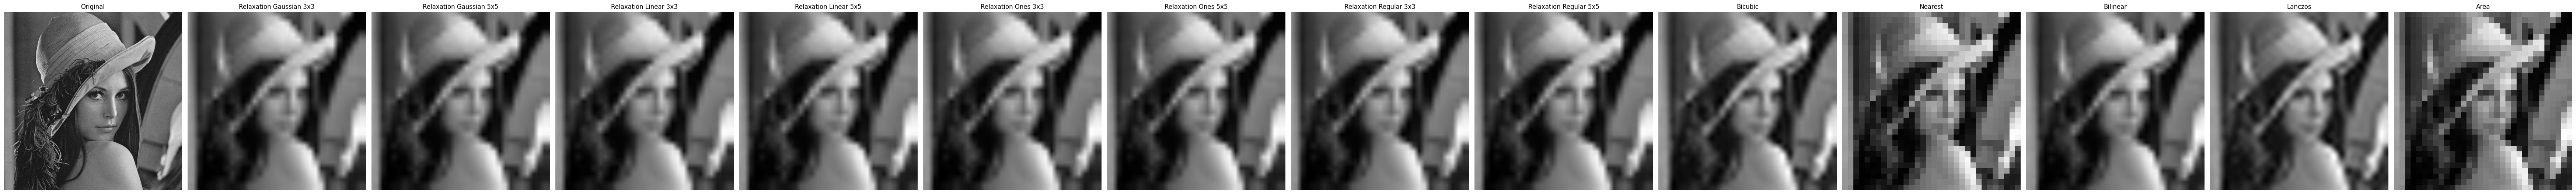

In [19]:
n = len(images) + 1  # Number of images plus one for the original
fig, axs = plt.subplots(1, n, figsize=(n * 5, 10))  # Adjust size as needed

# Plot original image
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off axis

# Plot each method's image
for i, (image, method) in enumerate(zip(images, methods), start=1):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(method)
    axs[i].axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

C:\Users\Alex\AppData\Local\Temp\ipykernel_28100\1045958333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_28100\1045958333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_28100\1045958333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)
C:\Users\Alex\AppData\Local\Temp\ipykernel_28100\1045958333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(methods, rotation=45)


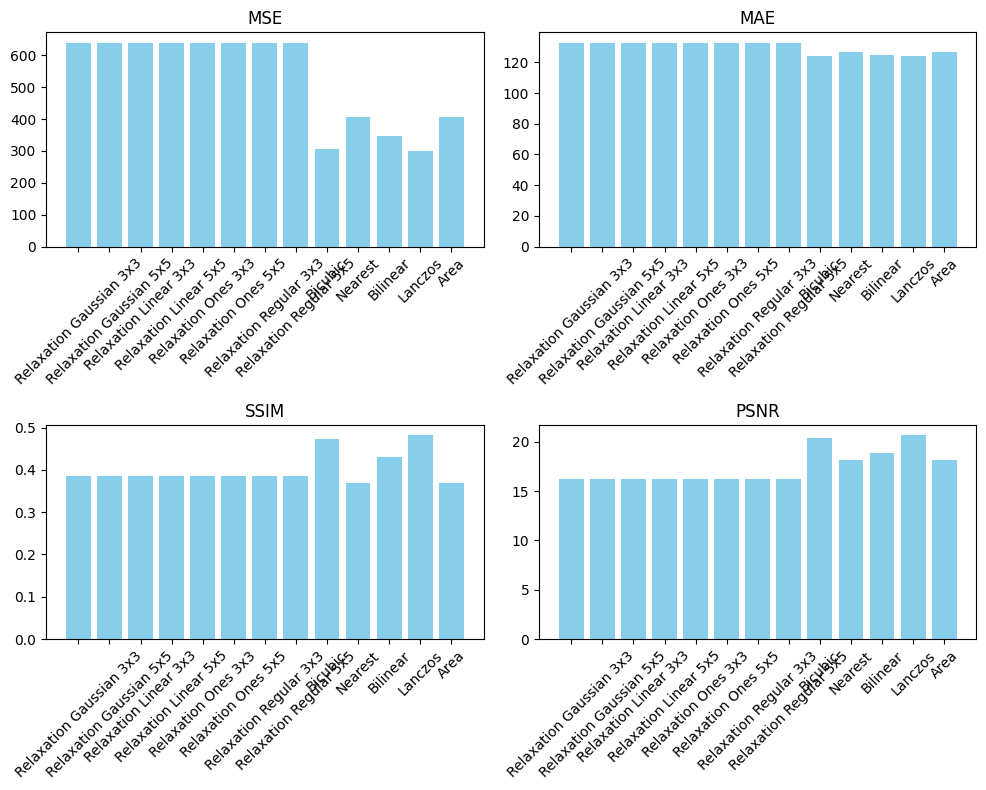

In [14]:
import matplotlib.pyplot as plt

# Setup plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.ravel()
metrics_names = ['MSE', 'MAE', 'SSIM', 'PSNR']

# Plot each metric
for i, metric in enumerate(metrics_names):
    values = [metrics[method][metric] for method in methods]
    axes[i].bar(methods, values, color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_xticklabels(methods, rotation=45)

plt.tight_layout()
plt.show()